In [1]:
import pandas as pd
import numpy as np
import pickle
from Load_data import *
import random
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
import cv2
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

In [2]:
filename_original = 'data_original.pickle'
filename_improved = 'data_improv.pickle'
path_gt = '../../large_dataset/large_dataset.json'

In [3]:
with open(filename_original, 'rb') as f:
    data = pickle.load(f)
data = data[0]
for key,aux in data.items():
    data[key] = { i : aux[i] for i in range(0, len(aux) ) }
est_original = pd.DataFrame(data)
est_original = est_original.transpose()

In [4]:
with open(filename_improved, 'rb') as f:
    data = pickle.load(f)
data = data[0]
for key,aux in data.items():
    data[key] = { i : aux[i] for i in range(0, len(aux) ) }
est_improved = pd.DataFrame(data)
est_improved = est_improved.transpose()

In [5]:
gt = load_gt(path_gt)

In [6]:
evaluate_pck( gt, est_original, threshold_type = "bbox")

{3: 0.48823529411764705,
 4: 0.4588235294117647,
 5: 0.6529411764705882,
 6: 0.7941176470588235,
 7: 0.36470588235294116,
 8: 0.7941176470588235,
 9: 0.6352941176470588,
 10: 0.3,
 11: 0.36470588235294116,
 12: 0.49411764705882355,
 13: 0.37058823529411766,
 14: 0.20588235294117646,
 15: 0.11764705882352941,
 16: 0.052941176470588235,
 17: 0.0058823529411764705,
 18: 0.052941176470588235}

In [7]:
evaluate_pck( gt, est_improved, threshold_type = "bbox")

{3: 0.9882352941176471,
 4: 0.8705882352941177,
 5: 0.9411764705882353,
 6: 0.7764705882352941,
 7: 0.5411764705882353,
 8: 0.7588235294117647,
 9: 0.5705882352941176,
 10: 0.31176470588235294,
 11: 0.3176470588235294,
 12: 0.14705882352941177,
 13: 0.06470588235294118,
 14: 0.041176470588235294,
 15: 0.023529411764705882,
 16: 0.023529411764705882,
 17: 0.01764705882352941,
 18: 0.023529411764705882}

In [8]:
img_name = random.choice(gt.index)
img_name = 'P_3m_2.jpg'

In [9]:
img_path =  os.path.join('..','..','large_dataset', img_name)
print(img_path)
img = cv2.imread(img_path) 

../../large_dataset/P_3m_2.jpg


In [10]:
center=[]
for i in est_improved.loc[[img_name]].loc[img_name]:
    center.append([i[0], i[1]])
center

[[1944.0, 963.0],
 [1951.0, 1203.0],
 [1800.0, 1278.0],
 [1684.0, 1592.0],
 [1671.0, 1818.0],
 [2108.0, 1230.0],
 [2457.0, 1182.0],
 [2580.0, 1032.0],
 [1821.0, 1784.0],
 [1800.0, 2255.0],
 [1821.0, 2563.0],
 [2074.0, 1818.0],
 [2053.0, 2255.0],
 [2012.0, 2563.0],
 [1944.0, 1797.0],
 [1958.0, 1517.0],
 [1944.0, 1107.0],
 [1643.0, 1907.0],
 [2641.0, 998.0],
 [1705.0, 2692.0],
 [2074.0, 2672.0]]

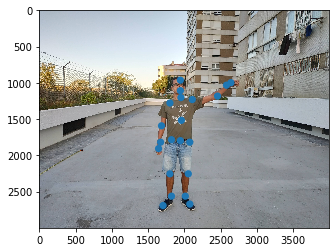

In [11]:
# Create a figure. Equal aspect so circles look circular
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Now, loop through coord arrays, and create a circle at each x,y pair
for c in center:
    circ = Circle(c,50)
    ax.add_patch(circ)

# Show the image
plt.show()